In [39]:
import math
import numpy
from matplotlib import pyplot
# помещаем рисунки в блокнот
%matplotlib inline

In [184]:
# сетка
N = 501
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N) 
y = numpy.linspace(y_start, y_end, N) 
X, Y = numpy.meshgrid(x, y)


X_source = numpy.loadtxt('NACA0012_x.txt')
Y_source = numpy.loadtxt('NACA0012_y.txt')
sigma = numpy.loadtxt('NACA0012_sigma.txt')

In [185]:
u_inf = 1.0 

u_freestream = u_inf  * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [186]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [187]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream function for source/sink
    """
    # arctan2 проверяет, что делаитель не равен нулю 
    psi = strength/(2*math.pi) * numpy.arctan2((Y - ys), (X -xs))
    
    return psi

In [211]:
u_source = numpy.zeros((N, N), dtype=float)
v_source = numpy.zeros((N, N), dtype=float)
psi_source = numpy.zeros((N, N), dtype=float)
for i in range(len(sigma)):
    psi_source_0 = get_stream_function(sigma[i], X_source[i], Y_source[i], X, Y)
    psi_source += psi_source_0
    u_source_0, v_source_0 = get_velocity(sigma[i], X_source[i], Y_source[i], X, Y)
    u_source += u_source_0
    v_source += v_source_0
    
print(psi_source.shape)

(501, 501)


In [212]:
x_stagnation = numpy.zeros((len(sigma),), dtype=float)
y_stagnation = numpy.zeros((len(sigma),), dtype=float)

for i in range(len(sigma)):
    x_stagnation[i] = X_source[i] - sigma[i]/(2*numpy.pi*u_inf)
    y_stagnation[i] = Y_source[i]

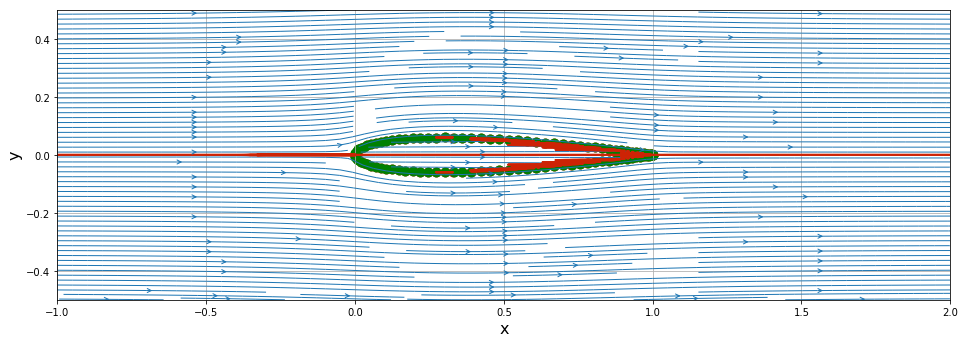

In [213]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# рисуем линии тока
size = 16
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(X_source, Y_source, color='#CD2305', s=80, marker='o')

# рисуем точку торможения
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# рисуем разделительную линию тока
pyplot.contour(X, Y, psi, 
            levels=[-sigma.sum()/501, +sigma.sum()/501], 
            colors='#CD2305', linewidths=2, linestyles='solid');

(501,)
cp_max = 0.9450682193853981
i = 250, j = 166


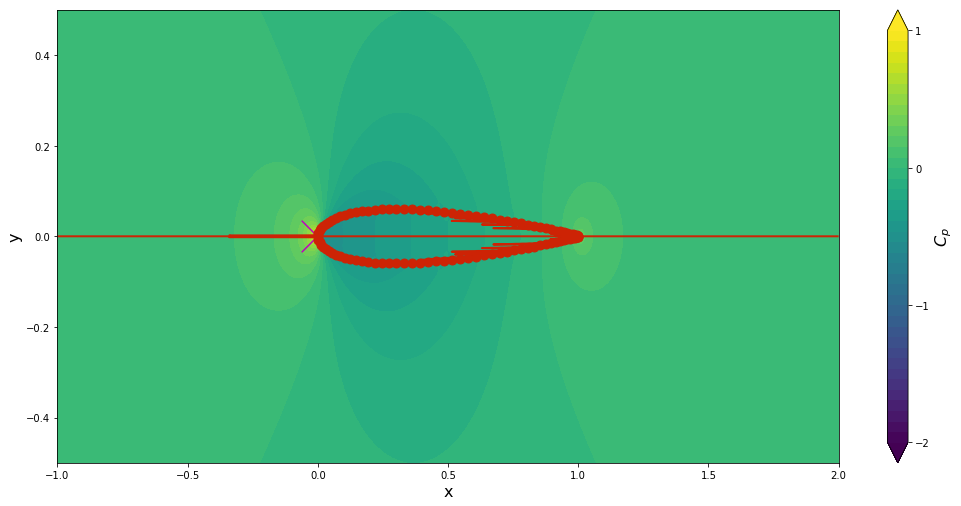

In [210]:
# вычисляем поле коэффициента давления
cp = 1.0 - (u**2+v**2)/u_inf**2

print(x.shape)

cp_max = cp.max(axis=0).max(axis=0)
print("cp_max = {}".format(cp_max))
i,j = numpy.where(cp==cp_max)
i,j = int(i),int(j)
print("i = {0}, j = {1}".format(int(i),int(j)))
# рисуем поле коэффициента давления
size = 25
pyplot.figure(figsize=(0.7*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 40),\
                        extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x[j], y[i], color='m', s=1000, marker='x')
pyplot.scatter(X_source, Y_source, color='#CD2305',\
               s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2,\
               linestyles='solid');